In [16]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Q1) Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column.

In [17]:
#data loading
beans_df = pd.read_excel("/home/preethi/Work/GITAIML/beans/Dry_Bean_Dataset.xlsx")
print(beans_df.head(2))



    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  


In [18]:
#describing data
print(beans_df.columns)
print(beans_df.shape)
print(beans_df.info())
print(beans_df.describe())

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
(13611, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non

In [19]:
beans_df['Class'].isna().sum()
# no nullpresent in class

#drop  naN from class column
beans_df.dropna(subset=['Class'],inplace=True)
print(beans_df.shape)

(13611, 17)


Q2) Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2] 

In [20]:
#Split the dataset into features (X) and the target variable (y)
X = beans_df.drop(['Class'],axis=1)
y = beans_df['Class']

In [21]:
#divide into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y)

Q3) Perform data scaling and modelling.

In [22]:
#Perform data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


Q4) Train Naive bayes and logistic regression

In [23]:
#Train Naive bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predNB = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predNB).sum()))

Number of mislabeled points out of a total 2723 points : 278


In [24]:
#hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)


y_predNB = nbModel_grid.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predNB).sum()))
print(nbModel_grid.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Number of mislabeled points out of a total 2723 points : 278
GaussianNB(var_smoothing=0.0023101297000831605)


In [25]:
#train logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_predLR = logreg.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_predLR).sum()))

Number of mislabeled points out of a total 2723 points : 214


Q5) Evaluate the model performance using a classification report and accuracy score and compare both the models 

In [29]:
# Native bayes evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predNB)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predNB))

Accuracy: 0.8979067205288285
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.79      0.85       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.86      0.93      0.89       326
    DERMASON       0.93      0.86      0.89       709
       HOROZ       0.95      0.95      0.95       386
       SEKER       0.92      0.94      0.93       406
        SIRA       0.80      0.89      0.85       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [30]:
# Logistic Regression evaluation


# Calculate accuracy
accuracy = accuracy_score(y_test, y_predLR)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predLR))

Accuracy: 0.9214102093279471
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



Q6) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives for both models.

Text(0.5, 427.9555555555555, 'Predicted label')

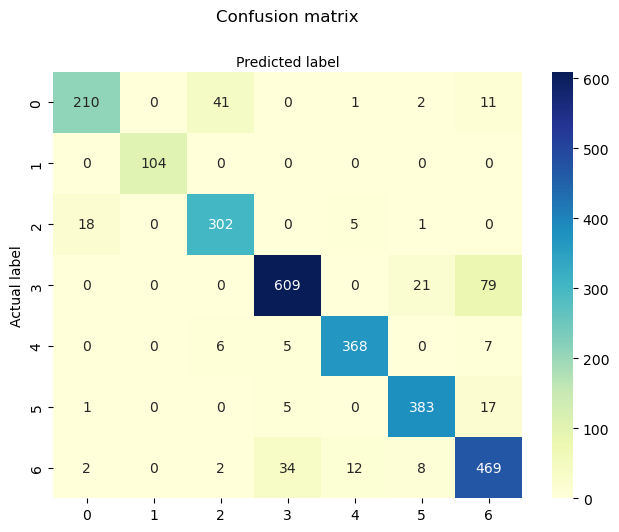

In [34]:
# Confusion matrix with naive bayes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cnf_matrixNB = confusion_matrix(y_test, y_predNB)
class_names=['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixNB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

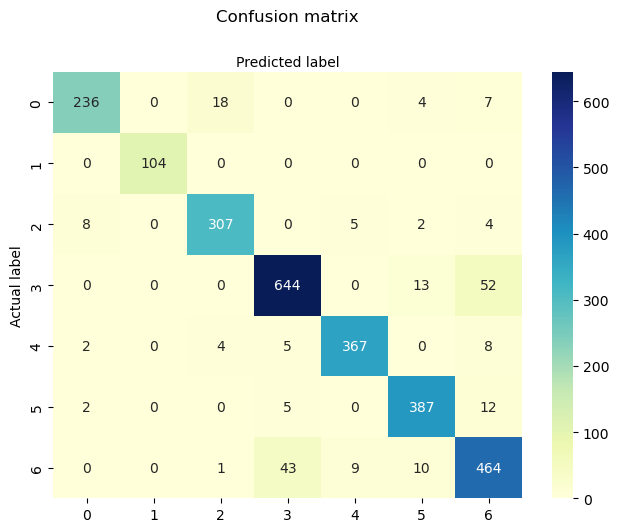

In [36]:
# confusion matrix with Logistic Regression
cnf_matrixLR = confusion_matrix(y_test, y_predLR)
class_names=['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixLR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Q7) Write some conclusion commenting which model is better and why ?

Logistic regression is better suited for this problem with better accuracy and prediction scores.
Even after hyper parameter tuning logistic regresssion model preformance is better than Naive bayes.